### Import libraries

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

### Preprocessing

#### Merging the 2019-2023 dataset

In [29]:
import pandas as pd
import numpy as np

# Load datasets for each year
data_2019 = pd.read_csv("Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2019.csv", header=None).drop(columns=[13])  # Drop 'Tahunan'
data_2020 = pd.read_csv("Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2020.csv", header=None).drop(columns=[0, 13])  # Drop 'Provinsi' and 'Tahunan'
data_2021 = pd.read_csv("Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2021.csv", header=None).drop(columns=[0, 13])  # Drop 'Provinsi' and 'Tahunan'
data_2022 = pd.read_csv("Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2022.csv", header=None).drop(columns=[0, 13])  # Drop 'Provinsi' and 'Tahunan'
data_2023 = pd.read_csv("Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2023.csv", header=None).drop(columns=[0, 13])  # Drop 'Provinsi' and 'Tahunan'

# Combine the datasets using concat along columns (axis=1)
data = pd.concat([data_2019, data_2020, data_2021, data_2022, data_2023], axis=1)

# Drop rows 0, 1, and 2 which contain the titles and descriptions of the dataset
data = data.drop([0, 1, 2])

# Reset index
data.reset_index(drop=True, inplace=True)

# Replace missing values ('-') with NaN
data.replace('-', np.nan, inplace=True)

# Drop NaN values
data.dropna(inplace=True)

# Create new feature names for the concatenated dataset
months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
years = ['2019', '2020', '2021', '2022', '2023']

# Rename features to ['Province'] + ['{month}'] * 12 + ['Annual']
new_features = ['province'] + [f'{month}_{year}' for year in years for month in months]

# Assign new column names
data.columns = new_features 

# Drop unnecessary row (INDONESIA)
data.drop(data[data['province'] == 'INDONESIA'].index, inplace=True)

# Display the final dataset shape and columns
print("Total instance and features:", data.shape)
print(data.columns)
print(data['province'].unique())

Total instance and features: (34, 61)
Index(['province', 'january_2019', 'february_2019', 'march_2019', 'april_2019',
       'may_2019', 'june_2019', 'july_2019', 'august_2019', 'september_2019',
       'october_2019', 'november_2019', 'december_2019', 'january_2020',
       'february_2020', 'march_2020', 'april_2020', 'may_2020', 'june_2020',
       'july_2020', 'august_2020', 'september_2020', 'october_2020',
       'november_2020', 'december_2020', 'january_2021', 'february_2021',
       'march_2021', 'april_2021', 'may_2021', 'june_2021', 'july_2021',
       'august_2021', 'september_2021', 'october_2021', 'november_2021',
       'december_2021', 'january_2022', 'february_2022', 'march_2022',
       'april_2022', 'may_2022', 'june_2022', 'july_2022', 'august_2022',
       'september_2022', 'october_2022', 'november_2022', 'december_2022',
       'january_2023', 'february_2023', 'march_2023', 'april_2023', 'may_2023',
       'june_2023', 'july_2023', 'august_2023', 'september_2023',

### Feature engineering

#### Creating growth_rate feature for each province

In [30]:
# # Converting numeric columns (starting from index 1) to numeric type
# data.iloc[:, 1:] = data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# # Calculating the total visits per year for each province
# total_2019 = data.iloc[:, 1:13].sum(axis=1)  # Total for 2019
# total_2020 = data.iloc[:, 13:25].sum(axis=1)  # Total for 2020
# total_2021 = data.iloc[:, 25:37].sum(axis=1)  # Total for 2021
# total_2022 = data.iloc[:, 37:49].sum(axis=1)  # Total for 2022
# total_2023 = data.iloc[:, 49:61].sum(axis=1)  # Total for 2023

# # Calculating the Growth Rate from year to year
# data['growth_rate_2020'] = (
#     (total_2020 - total_2019) / total_2019.replace(0, pd.NA) * 100
# )
# data['growth_rate_2021'] = (
#     (total_2021 - total_2020) / total_2020.replace(0, pd.NA) * 100
# )
# data['growth_rate_2022'] = (
#     (total_2022 - total_2021) / total_2021.replace(0, pd.NA) * 100
# )
# data['growth_rate_2023'] = (
#     (total_2023 - total_2022) / total_2022.replace(0, pd.NA) * 100
# )

# # Extracting growth rate data from 2020 to 2023
# growth_rates = data[['growth_rate_2020', 'growth_rate_2021', 'growth_rate_2022', 'growth_rate_2023']]
# data.head()


#### Creating and importing new data

In [31]:
# Creating a CSV file from the preprocessed data
data.to_csv('Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2019-2023.csv', index=False)

# Importing data using the preprocessed file
data = pd.read_csv('Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2019-2023.csv')
data

,province,january_2019,february_2019,march_2019,april_2019,may_2019,june_2019,july_2019,august_2019,september_2019,...,march_2023,april_2023,may_2023,june_2023,july_2023,august_2023,september_2023,october_2023,november_2023,december_2023
0,ACEH,1387574,1111607,1113176,1155705,1070909,1800152,1323272,1508073,1174513,...,557272,756915,791968,701963,871519,618671,565184,588020,637519,1673468
1,SUMATERA UTARA,5094564,3282713,3442407,3676763,3469100,5774370,3996409,3699782,3208776,...,1852752,2673955,2556839,2416258,2462212,1889717,1847654,1958158,1870337,3251911
2,SUMATERA BARAT,1667509,1313185,1420799,1573606,1511963,2910574,1719018,1207708,1011691,...,1056957,1373374,1538507,1407632,1413899,1072952,1083013,1121805,904282,1350709
3,RIAU,1990985,1425092,1541155,1563303,1574681,2179811,1646721,1227426,1018291,...,759760,935938,977332,1016640,1048542,893939,866457,908253,762348,1334426
4,JAMBI,828879,652908,716028,547378,438508,572785,498688,620967,580974,...,302700,414742,421741,424987,433896,375376,368132,386128,371185,609785
5,SUMATERA SELATAN,1763349,1294947,1356470,1099872,917156,1380350,848202,1265112,1121514,...,703181,1010231,1021583,968252,1013893,867202,867562,858520,725317,1373335
6,BENGKULU,414287,304721,336570,287546,258241,407898,292552,353997,347174,...,154106,248057,241660,225886,241961,199228,204566,209482,187859,680801
7,LAMPUNG,2082997,1612674,1606207,1164672,877643,1653991,992730,1422192,1191629,...,877374,1429885,1376686,1208281,1293197,997673,1030417,1058924,894880,1544279
8,KEP. BANGKA BELITUNG,298322,240226,255054,199678,122301,178462,148190,182592,171412,...,139812,185529,209111,218299,234099,206938,188694,173431,137343,400977
9,KEP. RIAU,434786,351865,358547,360392,358416,460205,413445,286867,244300,...,162989,162775,200190,230629,211471,180206,179288,186323,166685,285542


#### Calculating descriptive statistics

In [32]:
data.iloc[:, :-4].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
january_2019,34.0,1787771.79,2440059.92,90789.0,338613.50,813625.0,1934076.00,11116072.0
february_2019,34.0,1311435.97,1899786.67,48019.0,256349.75,651720.0,1380377.50,9942434.0
march_2019,34.0,1666740.24,2457786.79,84467.0,275433.00,709047.5,1589944.00,11088052.0
april_2019,34.0,1701670.35,2673674.52,102283.0,237821.00,662101.5,1571030.25,11993275.0
may_2019,34.0,1516139.29,2273896.83,109827.0,241131.25,670567.0,1435722.00,10148348.0
june_2019,34.0,2314456.35,3725873.29,119683.0,339172.25,935747.5,2239787.75,17758640.0
july_2019,34.0,1698219.76,2584133.77,102619.0,300326.50,765201.5,1709901.75,12666376.0
august_2019,34.0,1891383.56,2963192.71,99582.0,291442.00,751572.5,1591248.00,13851900.0
september_2019,34.0,1629603.06,2579218.56,73498.0,250047.50,648653.0,1381884.50,11808826.0
october_2019,34.0,1828636.91,2943878.71,93397.0,281861.00,681511.5,1539476.50,13129658.0


##### Mean of domestic tourist visits per month

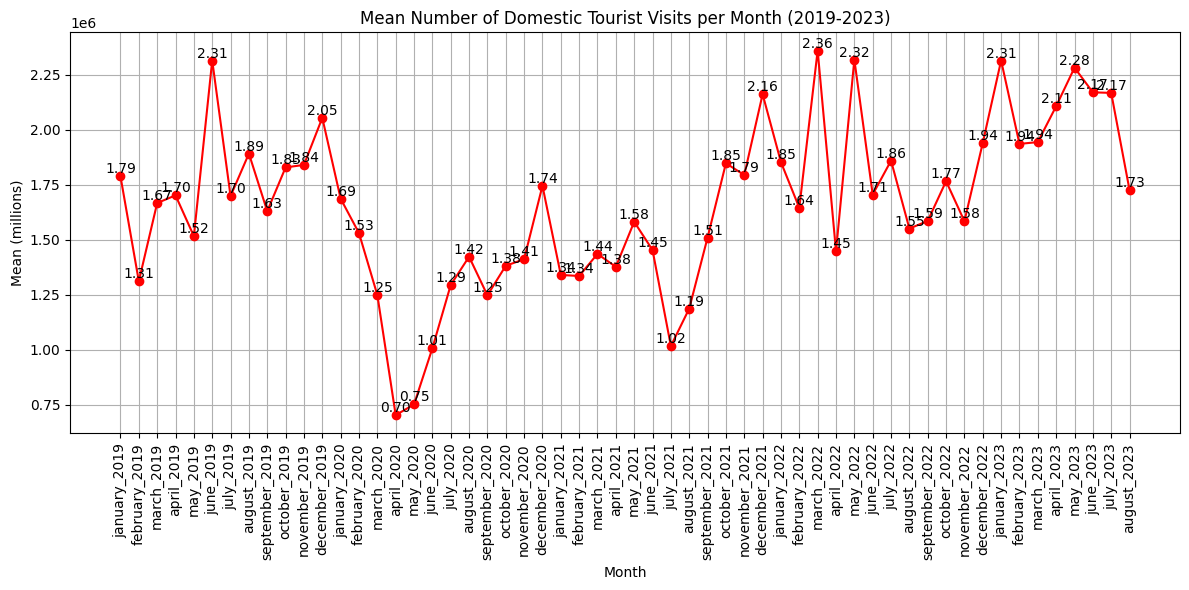

In [33]:
# Calculating the mean for each column
mean = data.iloc[:, 1:-4].mean().round(2)

# Creating a mean plot
plt.figure(figsize=(12, 6))
plt.plot(mean, marker='o', color='r')

# Adding numbers to each point on the plot
for i, value in enumerate(mean):
    plt.text(i, value, f'{value/1e6:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Mean Number of Domestic Tourist Visits per Month (2019-2023)')
plt.xlabel('Month')
plt.ylabel('Mean (millions)')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()


#### Median of domestic tourist visits per month

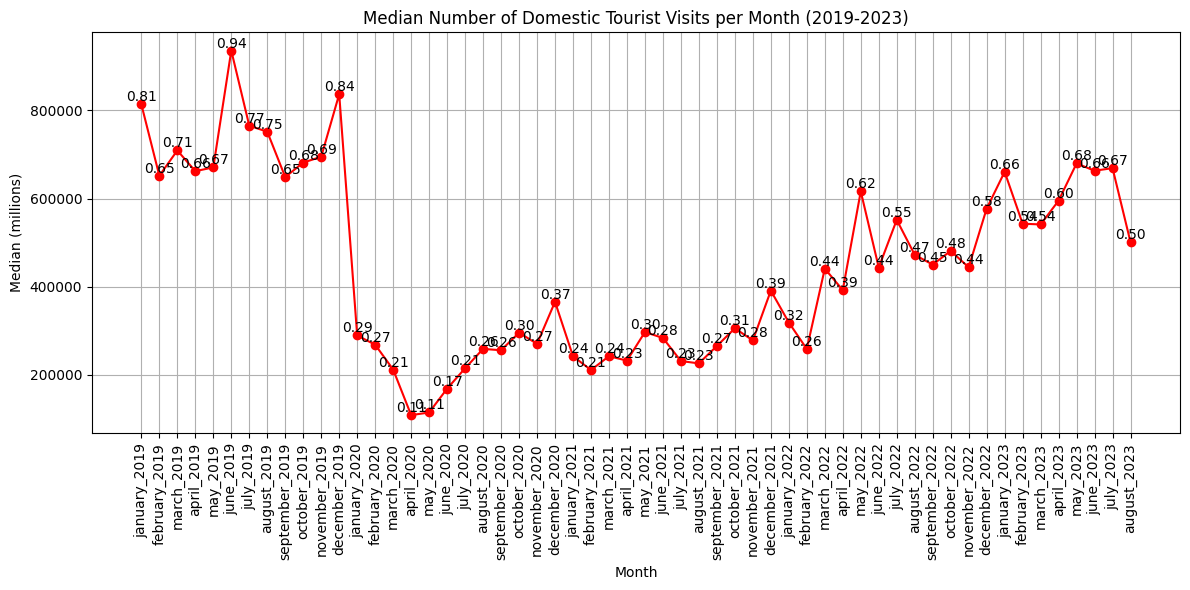

In [34]:
# Calculating the median for each column
median = data.iloc[:, 1:-4].median().round(2)

# Creating a median plot
plt.figure(figsize=(12, 6))
plt.plot(median, marker='o', color='r')

# Adding numbers to each point on the plot
for i, value in enumerate(median):
    plt.text(i, value, f'{value/1e6:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Median Number of Domestic Tourist Visits per Month (2019-2023)')
plt.xlabel('Month')
plt.ylabel('Median (millions)')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

#### Standard deviation of domestic tourist visits per month

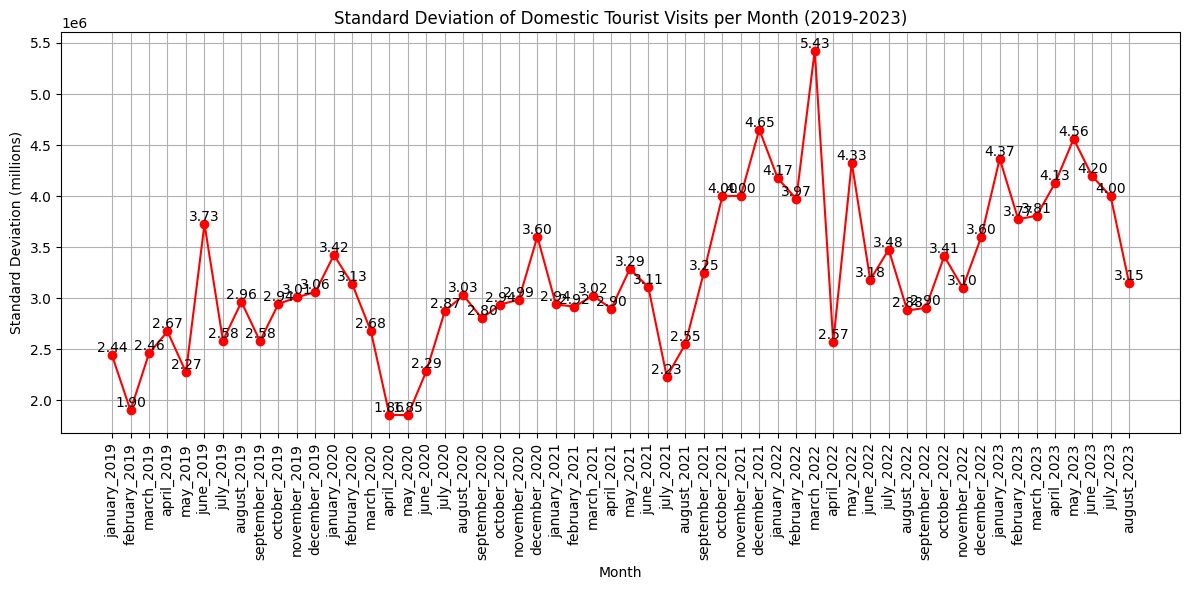

In [35]:
# Calculating the standard deviation
std = data.iloc[:, 1:-4].std().round(2)

# Creating a standard deviation plot
plt.figure(figsize=(12, 6))
plt.plot(std, marker='o', color='r')

# Adding numbers to each point on the plot
for i, value in enumerate(std):
    plt.text(i, value, f'{value/1e6:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Standard Deviation of Domestic Tourist Visits per Month (2019-2023)')
plt.xlabel('Month')
plt.ylabel('Standard Deviation (millions)')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

#### Min and max of domestic tourist visits per month

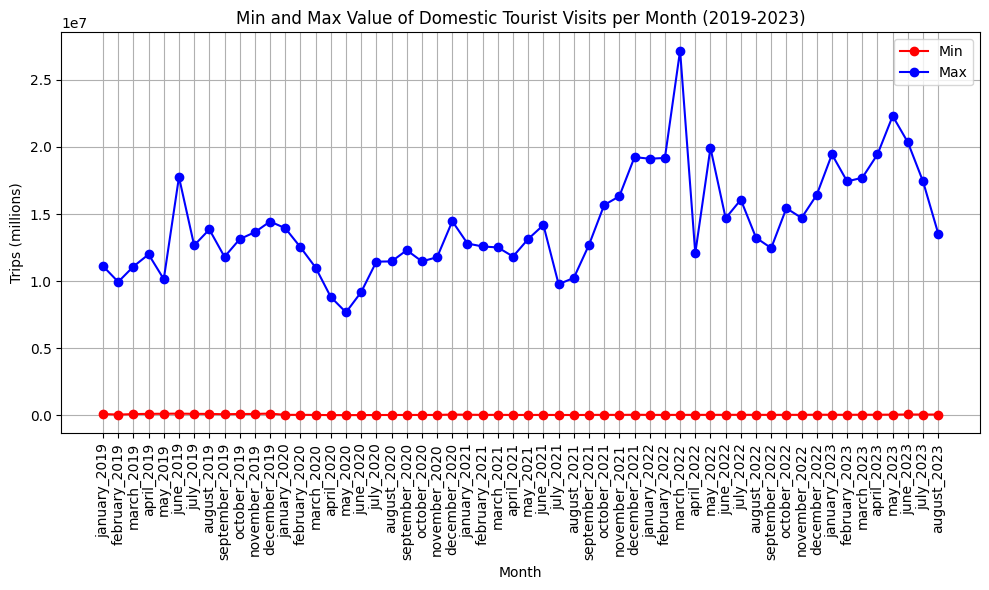

In [39]:
# Calculating the min and max value for each column
min_data = data.iloc[:, 1:-4].min()
max_data = data.iloc[:, 1:-4].max()

# Creating a min and max plot
plt.figure(figsize=(10, 6))
plt.plot(min_data, marker='o', color='red', label='Min')
plt.plot(max_data, marker='o', color='blue', label='Max')
plt.title('Min and Max Value of Domestic Tourist Visits per Month (2019-2023)')
plt.xlabel('Month')
plt.ylabel('Trips (millions)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Growth rate percetage (2019-2023)

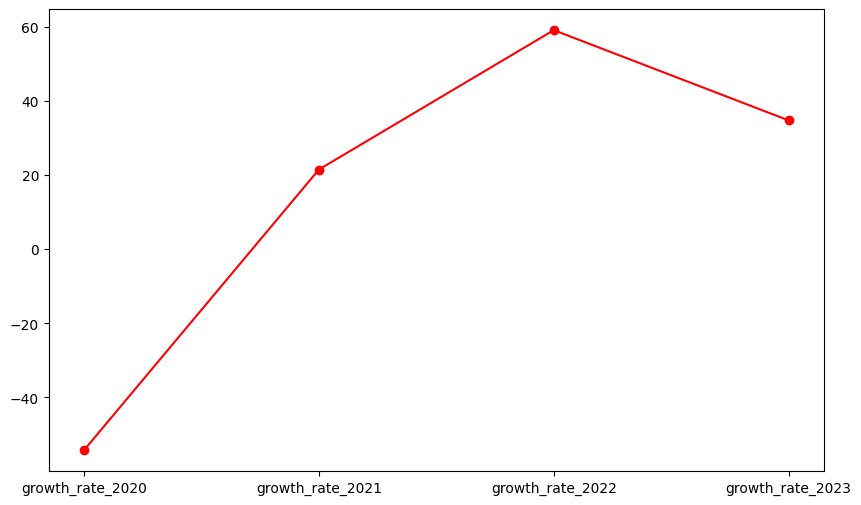

In [37]:
# plt.figure(figsize=(10, 6))
# plt.plot(growth_rates.mean(), marker='o', color='r')
# plt.show()

#### Melakukan normalisasi data

In [38]:
# Normalisasi data menggunakan MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(data.iloc[:, 1:])
# data_scaled = pd.DataFrame(data_scaled, columns=data.columns[1:])
# data = data_scaled

# # Menampilkan data yang sudah dinormalisasi
# data